In [1]:
import logic_test_bed
from logical_equivalence import *
from logical_statements import *
import networkx as nx

In [2]:
p = Create.atom(symbol='p')
q = Create.atom(symbol='q')
r = Create.atom(symbol='r')

# general use negations
not_p = Create.negation(p)
not_q = Create.negation(q)
not_r = Create.negation(r)

# general use conjunctions
p_and_q = Create.conjunction(p, q)
q_and_p = Create.conjunction(q, p)
q_and_r = Create.conjunction(q, r)

# general use disjunctions
p_or_q = Create.disjunction(p, q)
q_or_p = Create.disjunction(q, p)
q_or_r = Create.disjunction(q, r)

# for de morgans tests
not_of_p_and_q = Create.negation(p_and_q)
not_p_or_not_q = Create.disjunction(not_p, not_q)

not_of_p_or_q = Create.negation(p_or_q)
not_p_and_not_q = Create.conjunction(not_p, not_q)

# for associative law

In [3]:
p_or_q_equivs = all_one_step_equivalents_of(p_or_q)
p_and_p_or_q = Create.conjunction(p, p_or_q)
p_and_p_or_q_equivs = all_one_step_equivalents_of(p_and_p_or_q)

In [4]:
print(4)

4


In [5]:
print(f'Original: {p_or_q.symbol}\n\n')

print('Equivalents found:')
for stmt, law in p_or_q_equivs:
    print(f'{stmt.symbol}    <--- {str(law)}')

Original: (p ∨ q)


Equivalents found:
(q ∨ p)    <--- <class 'logical_equivalence.CommutativeLaw'>
~~(p ∨ q)    <--- <class 'logical_equivalence.ReverseDoubleNegativeLaw'>
(~~p ∨ q)    <--- <class 'logical_equivalence.ReverseDoubleNegativeLaw'>
(p ∨ ~~q)    <--- <class 'logical_equivalence.ReverseDoubleNegativeLaw'>


In [6]:
print(f'Original: {p_and_p_or_q.symbol}\n\n')

print('Equivalents found:')
for stmt, law in p_and_p_or_q_equivs:
    print(f'{stmt.symbol}{" "* (20-len(stmt.symbol))}<--- {law}')

Original: (p ∧ (p ∨ q))


Equivalents found:
((p ∨ q) ∧ p)       <--- <class 'logical_equivalence.CommutativeLaw'>
((p ∧ p) ∨ (p ∧ q)) <--- <class 'logical_equivalence.DistributiveLaw'>
~~(p ∧ (p ∨ q))     <--- <class 'logical_equivalence.ReverseDoubleNegativeLaw'>
p                   <--- <class 'logical_equivalence.AbsorptionLaw'>
(~~p ∧ (p ∨ q))     <--- <class 'logical_equivalence.ReverseDoubleNegativeLaw'>
(p ∧ (q ∨ p))       <--- <class 'logical_equivalence.CommutativeLaw'>
(p ∧ ~~(p ∨ q))     <--- <class 'logical_equivalence.ReverseDoubleNegativeLaw'>


In [7]:
""" It appears to be working! I can get all the one step equivalents of the above 2 statements."""


' It appears to be working! I can get all the one step equivalents of the above 2 statements.'

In [8]:
# GRAPHING
# Nodes will be graph symbols. Statement object will be stored in node.
# Edges will be law names

def add_new_nodes_from(statement: Statement, G: nx.Graph):
    new_one_step_equivalents = all_one_step_equivalents_of(statement)

    for new_statement, law_used in new_one_step_equivalents:
        print(law_used.short_name)
        G.add_node(new_statement.symbol, object=new_statement)
        G.add_edge(statement.symbol, new_statement.symbol, law_object=law_used, law_name=law_used.short_name)

In [9]:
G = nx.Graph()
G.add_node(p_or_q.symbol, object=p_or_q)
add_new_nodes_from(p_or_q, G)

Commut.
Rev. Doub. Neg.
Rev. Doub. Neg.
Rev. Doub. Neg.


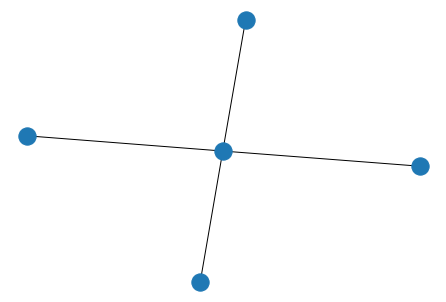

In [10]:
nx.draw(G)

In [17]:
def plot_g(G: nx.Graph):
    nx.draw(G, with_labels=True)
    pos= nx.spring_layout(G)
    labels = nx.get_edge_attributes(G,'law_name')
    print('s')
    x = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.5, font_size=8)

In [12]:
""" I can get a one step graph and print it with node and edge labels being the statement symbol and
law used respectively"""


' I can get a one step graph and print it with node and edge labels being the statement symbol and\nlaw used respectively'

In [13]:
def add_statement_to(G: nx.Graph, statement: Statement):
    G.add_node(statement.symbol, object=statement)

def add_equivalent_statement_to(G: nx.Graph,
                                first: Statement, second: Statement,
                                law_used: LawOfEquivalence):
    G.add_edge(first.symbol, second.symbol, law_object=law_used, law_name=law_used.short_name)

In [44]:
def lazy_statement_equivalence_search(first: Statement, target: Statement, layers_to_search):
    G = nx.Graph()
    nx.set_node_attributes(G, False, 'start')
    nx.set_node_attributes(G, False, 'target')

    add_statement_to(G, first)

    G.nodes[first.symbol]['start'] = True

    statements_to_search = [first]
    target_found = False

    statements_searched = []

    while statements_to_search and not target_found or layers_to_search > 0:
        nodes_added = []
        for search_statement in statements_to_search:
            if not search_statement or search_statement.symbol in statements_searched:
                print(search_statement)
                statements_to_search.remove(search_statement)
                continue


            equivalent_statements = all_one_step_equivalents_of(search_statement)
            for equivalent_statement, law_used in equivalent_statements:
                if equivalent_statement.symbol not in G:
                    nodes_added.append(equivalent_statement)
                    add_equivalent_statement_to(G, search_statement, equivalent_statement, law_used)

            if target.symbol in equivalent_statements:
                target_found = True
                print('target found')
                G.nodes[target.symbol]['target'] == True
                return G

            statements_searched.append(search_statement.symbol)
            statements_to_search.remove(search_statement)

        statements_to_search = nodes_added
        nodes_added = []
        layers_to_search -= 1

    return G

In [58]:
def plot_equivalence_search_graph(G: nx.Graph, start, target):
    pos= nx.spring_layout(G, seed=69696969)
    labels = nx.get_edge_attributes(G,'law_name')

    nx.draw(G, with_labels=True)
    x = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.5, font_size=8)
    nx.draw_networkx_nodes(G, pos, nodelist=[start.symbol], node_color='tab:red')
    nx.draw_networkx_nodes(G, pos, nodelist=[target.symbol], node_color='tab:greed')

In [63]:
#### TESTING LAZY EQUIVALENCE SEARCH
not_p_or_q = Create.conjunction(not_p, q)
start = not_p_or_q
target = p_or_q_equivs[2][0]
search_graph = lazy_statement_equivalence_search(start, target, layers_to_search=4)


RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
search_graph.nodes

In [62]:
plot_equivalence_search_graph(search_graph, start, target)

NameError: name 'start' is not defined